In [ ]:
#Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum-Tugas_MachineLearning/Praktikum4"

In [ ]:
import pandas as pd

# Ganti path sesuai lokasi file kamu di Google Drive
path = '/content/gdrive/MyDrive/Praktikum-Tugas_MachineLearning/Praktikum4/Data/calonpembelimobil.csv'

df = pd.read_csv(path)
df.head()


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Buat dan latih model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.93

Confusion Matrix:
 [[ 55   9]
 [  5 131]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
# Contoh data baru
data_baru = pd.DataFrame({
    'Usia': [35, 50],
    'Status': [1, 2],
    'Kelamin': [1, 0],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [200, 300]
})

# Prediksi apakah beli mobil (1) atau tidak (0)
prediksi = model.predict(data_baru)
print(prediksi)


[0 1]


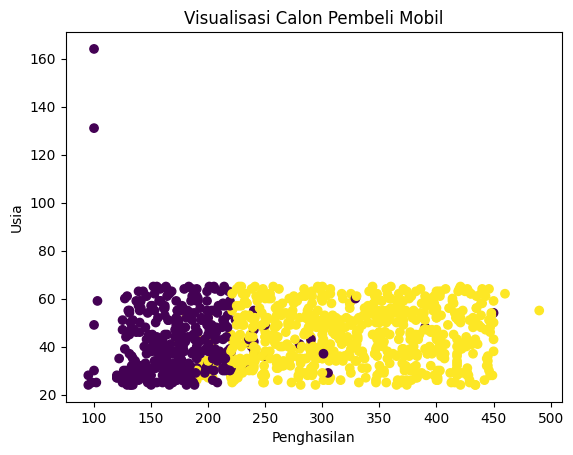

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Penghasilan'], df['Usia'], c=df['Beli_Mobil'])
plt.xlabel('Penghasilan')
plt.ylabel('Usia')
plt.title('Visualisasi Calon Pembeli Mobil')
plt.show()


In [ ]:
coeff = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_[0]
})
print(coeff)


            Fitur  Koefisien
0            Usia  -0.018268
1          Status  -0.151996
2         Kelamin  -1.247800
3  Memiliki_Mobil   0.185256
4     Penghasilan   0.062970
